A carbon seems to have 3 nearest carbon neighbours and one hyrogen from lewis structure but according to my charge_nearest_neighbour code the charge is 24 = 4 carbons. Check 3D structure to see if there is a bug in the code.

In [4]:
import numpy as np
import pandas as pd
import qml
import sklearn.model_selection as sk
from ase import Atoms
from ase.visualize import view

from matplotlib import pyplot as plt

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG

import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
import qml_interface as qmi
import explore_qml_data as eqd

In [5]:
# data preparation
paths = qmi.wrapper_alch_data()
exclude='/home/misa/APDFT/prototyping/atomic_energies/results/slice_ve38/dsgdb9nsd_000829/atomic_energies_with_mic.txt'
paths.remove(exclude)
paths.remove('/home/misa/APDFT/prototyping/atomic_energies/results/slice_ve38/dsgdb9nsd_001265/atomic_energies_with_mic.txt')
data, molecule_sizes = qmi.load_alchemy_data(paths)

all_local_reps = qmi.generate_atomic_representations(data, molecule_sizes)

atomic_database = pd.DataFrame(index=np.arange(molecule_sizes.sum()), columns=['mol_id', 'smiles', 'Z', 'atomic energy', 'atomisation energy', 'charge NN'])
# make a database
index_database = 0
for i, p in enumerate(paths):
    data = np.loadtxt(p)
    # get smiles
    comp = p.split('/')[-2]
    xyz_path = f'/home/misa/datasets/qm9/{comp}.xyz'
    smiles = eqd.get_smiles(xyz_path)
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    cnn = eqd.get_charge_neighbours(mol)
    for d, c in zip(data, cnn):
        atomic_database.at[index_database, 'mol_id'] = i
        atomic_database.at[index_database, 'smiles'] = smiles
        atomic_database.at[index_database, 'Z'] = d[0]
        atomic_database.at[index_database, 'atomic energy'] = d[5]
        atomic_database.at[index_database, 'atomisation energy'] = d[6]
        atomic_database.at[index_database, 'charge NN'] = c
        index_database += 1

FileNotFoundError: [Errno 2] No such file or directory: '/home/misa/projects/Atomic-Energies/data/ueg_reference/qm9_ve38_lda/energies_ve38_paths'

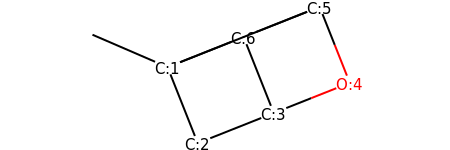

In [3]:
mol = Chem.MolFromSmiles('CC12CC3OC1C23')
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol
mol_with_atom_index(mol)

In [4]:
atomic_database[atomic_database['smiles']=='CC12CC3OC1C23']

,mol_id,smiles,Z,atomic energy,atomisation energy,charge NN
3046,221,CC12CC3OC1C23,6,-37.6636,3.55102,9
3047,221,CC12CC3OC1C23,6,-44.3531,-3.13851,24
3048,221,CC12CC3OC1C23,6,-41.487,-0.272373,14
3049,221,CC12CC3OC1C23,6,-43.1591,-1.94445,21
3050,221,CC12CC3OC1C23,8,-61.0098,17.4226,12
3051,221,CC12CC3OC1C23,6,-43.6974,-2.48277,21
3052,221,CC12CC3OC1C23,6,-42.6288,-1.41421,19
3053,221,CC12CC3OC1C23,1,-5.39058,-1.52246,6
3054,221,CC12CC3OC1C23,1,-5.38418,-1.51606,6
3055,221,CC12CC3OC1C23,1,-5.45468,-1.58655,6


In [5]:
special = None
for i, p in enumerate(paths):
    data = np.loadtxt(p)
    # get smiles
    comp = p.split('/')[-2]
    xyz_path = f'/home/misa/datasets/qm9/{comp}.xyz'
    smiles = eqd.get_smiles(xyz_path)
    if smiles == 'CC12CC3OC1C23':
        special = data
        print(xyz_path)

/home/misa/datasets/qm9/dsgdb9nsd_002432.xyz


In [6]:
compound = qml.Compound(xyz='/home/misa/datasets/qm9/dsgdb9nsd_002432.xyz')
atoms = Atoms(positions=compound.coordinates, symbols=compound.atomtypes)

In [7]:
view(atoms, viewer='ngl')

In [9]:
import ase.visualize

In [10]:
ase.visualize.ngl.view_ngl(atoms, w=500, h=500)